In [1]:
# Import packages
%matplotlib inline
import mpld3
mpld3.enable_notebook()
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from util import *
from filter_design import *
from feature_detection import *
import scipy.signal as sgn
from ipywidgets import interact, interactive, fixed
from IPython.display import display

# Encontrando um período do ECG

## Usando correlação cruzada
Nessa seção será usada a autocorrelação para encontrar um período do eletrocardiograma

### Mostra gráfico de um ECG


/usr/lib/python2.7/site-packages/IPython/core/formatters.py:92: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
/usr/lib/python2.7/site-packages/IPython/core/formatters.py:669: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):


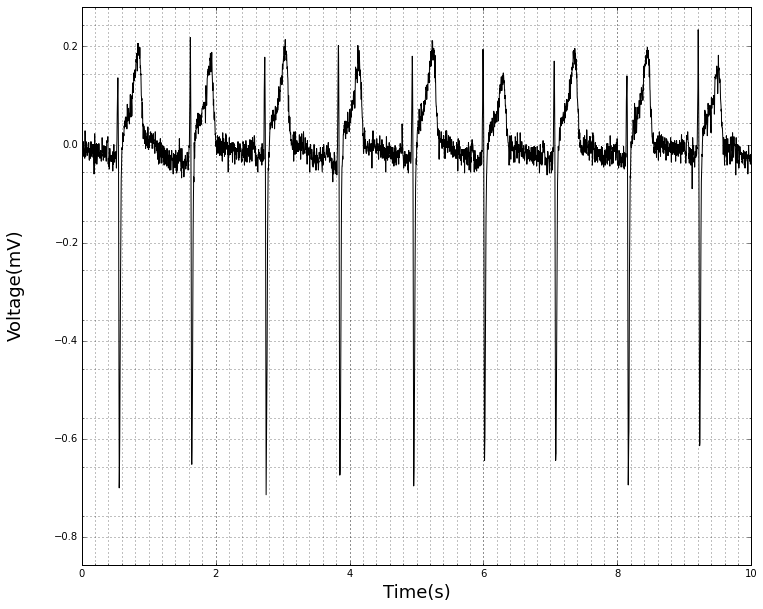

In [2]:
# Get signal
x, fs = get_signal(1,3)

# plot signal
plot_signal(x, fs)

### Usa sequencia de autocorrelação para achar período

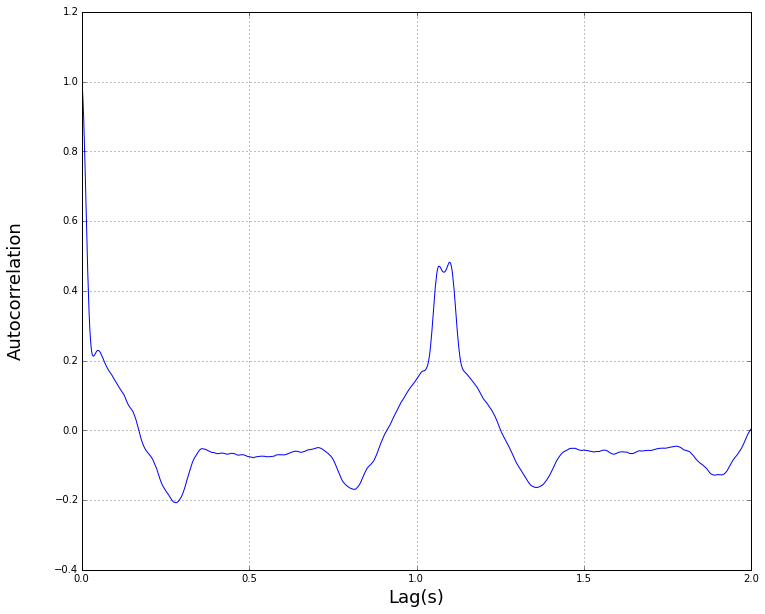

In [3]:
plot_crosscorr(x, fs)

period, min_period=find_ecgperiod(x,fs)

# Destacando o complexo QRS
O seguinte método é utilizado para destacar o complexo QRS: primeiro é aplicada a primeira 
difereça e depois é aplicada a transformada Hilbert.

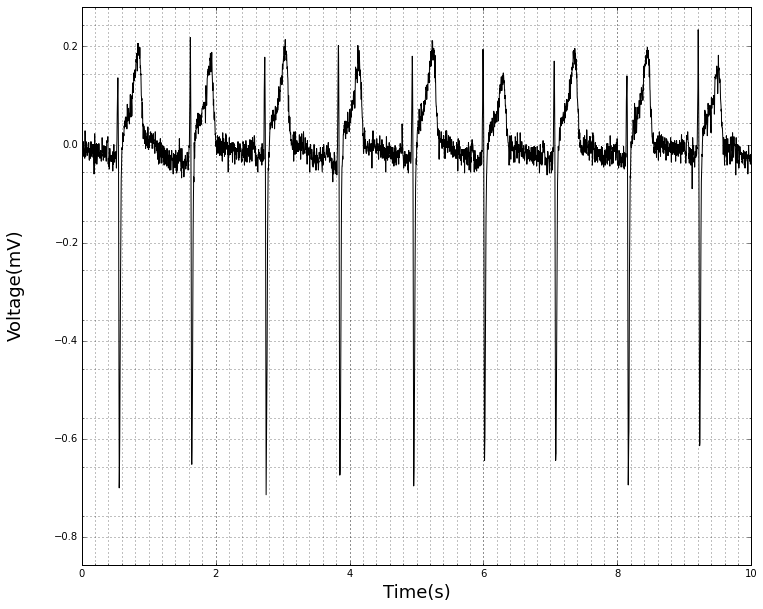

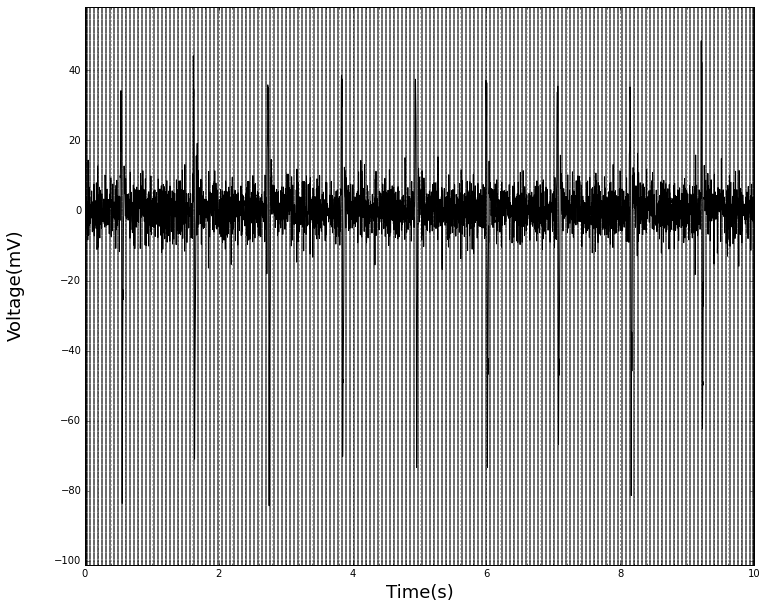

In [4]:
xe = enhance_ecg(x, fs)
plot_signal(x, fs)
plot_signal(xe, fs)

# Encontrando os picos R
Usa o sinal destacado, juntamente com as informações sobre o período, para encontrar
picos R

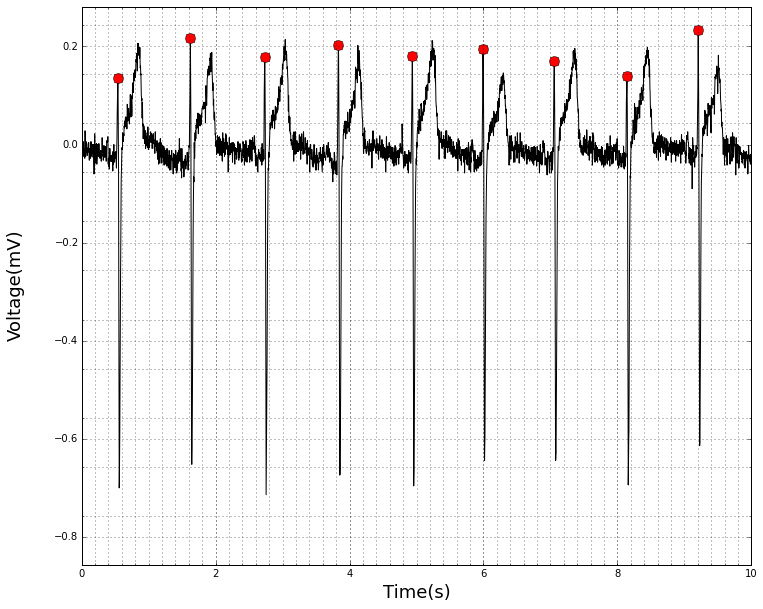

In [5]:
peaks = find_Rwave(x, xe, fs, period, min_period)

plot_peaks(x, fs, peaks)

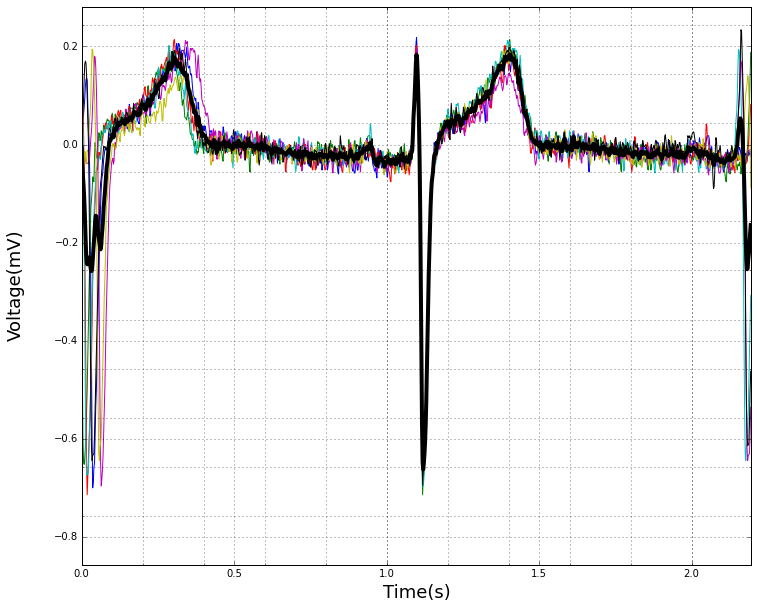

In [6]:
interval = subdivide_ecg(x, fs, peaks, period)
plot_entangled_signal(x, fs, interval, period)